Валерія Дружиніна

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

## Линейная регрессия

Наша задача - предсказать уровень преступности на душу населения, используя переменные в наборе данных Boston. Уровень преступности на душу населения будет нашим ответом, а другие переменные - предикторами.

### Бостон датасет

Датасет содержит такие данные:

-crim -- уровень преступности на душу населения по городам.

-zn -- доля земель под жилую застройку, зонированных на участки более 25 000 кв. футов.

-indus -- доля акров, не относящихся к розничной торговле, на город.

-chas -- фиктивная переменная реки Чарльз (= 1, если участок ограничивает реку; 0 в противном случае).

-nox -- концентрация оксидов азота (частей на 10 млн).

-rm -- среднее количество комнат в доме.

-age -- доля занятых владельцами участков, построенных до 1940 года.

-dis -- среднее расстояние до пяти бостонских центров занятости.

-rad -- индекс доступности радиальных магистралей.

-tax -- полная ставка налога на имущество за \ $ 10,000.

-ptratio -- соотношение учеников и учителей по городам.

-lstat -- более низкий статус населения (в процентах).

-medv -- медианная стоимость домов, занимаемых владельцами, за 1000 долларов.


Sources:
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [2]:
data = pd.read_csv('Boston_dataset.csv',index_col=0)

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Задание 1

- Для каждого предиктора подберите простую модель линейной регрессии, чтобы предсказать ответ. 
- Опишите свои результаты. 
- В какой из моделей существует статистически значимая связь между предиктором и ответом? 
- Создайте несколько графиков, подтверждающих ваши утверждения.

In [21]:
X = data['zn']
Y = data['crim']
X = sm.add_constant(X)
model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()
print(results_lin.summary())
#-0.0739 имеет отрицательный ефект на результат, с увеличением zn (долей земель под жилую застройку, зонированных на участки более 25 000 кв. футов.)
    #    уменшается преступность
#R-squared:0.040, только 4% описивается моделю
#F-statistic:21.10, перемение имеють значения.
#P>|t| - существует статистически значимая связь между предиктором и ответом

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           5.51e-06
Time:                        00:55:07   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4537      0.417     10.675      0.0

In [10]:
X = data['indus']
Y = data['crim']
X = sm.add_constant(X)
model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()
print(results_lin.summary())

#0.5098 имеет положительний ефект на результат, с увеличением indus(доля акров, не относящихся к розничной торговле, на город.)
    #    увеличевается преступность
#R-squared:0.165, 16,5% данных описивается моделю
#F-statistic:99.82, перемение имеють значения.
#P>|t| - существует статистически значимая связь между предиктором и ответом

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     99.82
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           1.45e-21
Time:                        00:47:35   Log-Likelihood:                -1760.6
No. Observations:                 506   AIC:                             3525.
Df Residuals:                     504   BIC:                             3534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0637      0.667     -3.093      0.0

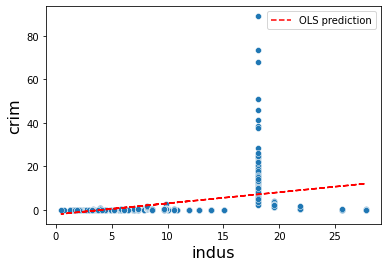

In [15]:
#График
X = data['indus']
Y = data['crim']
X = sm.add_constant(X)
model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()

predictions_lin = results_lin.predict()

fig, ax = plt.subplots()
sns.scatterplot(data=data, x='indus', y='crim')
ax.plot(X['indus'], predictions_lin, 'r--', label="OLS prediction")
ax.set_xlabel('indus',size=16)
ax.set_ylabel('crim',size=16)
ax.legend(loc="best")
#fig.savefig('mpg_linear.png')

In [10]:
X = data['chas']
Y = data['crim']
X = sm.add_constant(X)
model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()
print(results_lin.summary())
#-0.0739 имеет отрицательный ефект на результат, с увеличением chas (фиктивная переменная реки Чарльз (= 1, если участок ограничивает реку; 0 в противном случае).)
    #    уменшается преступность
#R-squared:0.003, очень плохо, модель почти нечего не потривает 
#F-statistic:1.579, значение близко к 1 нет звязи меж предиктором и ответом.
#P>|t|: 0.209 - нет звязи между предиктором и ответом. коэф может быть нульом.

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Thu, 17 Nov 2022   Prob (F-statistic):              0.209
Time:                        22:39:22   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7444      0.396      9.453      0.0

In [11]:
X = data['nox']
Y = data['crim']
X = sm.add_constant(X)
model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()
print(results_lin.summary())
#31.2485 имеет очень позитивний ефект на результат, с увеличением nox(концентрация оксидов азота (частей на 10 млн).)
    #    увеличевается преступность
#R-squared:0.177, 16,7% данных описивается моделю
#F-statistic: 108.6, перемение имеють значения.
#P>|t| - существует статистически значимая связь между предиктором и ответом

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     108.6
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           3.75e-23
Time:                        20:46:54   Log-Likelihood:                -1757.0
No. Observations:                 506   AIC:                             3518.
Df Residuals:                     504   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.7199      1.699     -8.073      0.0

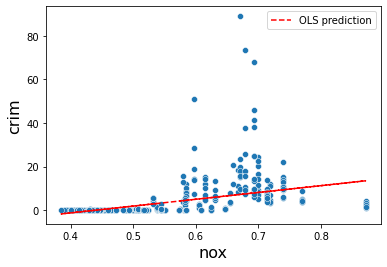

In [23]:
#График
X = data['nox']
Y = data['crim']
X = sm.add_constant(X)
model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()


predictions_lin = results_lin.predict()

fig, ax = plt.subplots()
sns.scatterplot(data=data, x='nox', y='crim')
ax.plot(X['nox'], predictions_lin, 'r--', label="OLS prediction")
ax.set_xlabel('nox',size=16)
ax.set_ylabel('crim',size=16)
ax.legend(loc="best")
#fig.savefig('mpg_linear.png')


In [11]:
X = data['rm']
Y = data['crim']
X = sm.add_constant(X)
model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()
print(results_lin.summary())
#-2.6841 имеет отрицательный ефект на результат, с увеличением rm (среднее количество комнат в доме.)
    #    уменшается преступность
#R-squared:0.048, только 4,8% описивается моделю
#F-statistic:25.45, перемение имеють значения.
#P>|t| - существует статистически значимая связь между предиктором и ответом

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.45
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           6.35e-07
Time:                        22:39:30   Log-Likelihood:                -1793.9
No. Observations:                 506   AIC:                             3592.
Df Residuals:                     504   BIC:                             3600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4818      3.364      6.088      0.0

In [13]:
X = data['age']
Y = data['crim']
X = sm.add_constant(X)
model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()
print(results_lin.summary())
# 0.1078 имеет очень позитивний ефект на результат, с увеличением age(доля занятых владельцами участков, построенных до 1940 года.)
    #    увеличевается преступность
#R-squared:0.124, 12,4% данных описивается моделю
#F-statistic: 71.62, перемение имеють значения.
#P>|t| - существует статистически значимая связь между предиктором и ответом

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     71.62
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           2.85e-16
Time:                        20:47:14   Log-Likelihood:                -1772.7
No. Observations:                 506   AIC:                             3549.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7779      0.944     -4.002      0.0

In [5]:
X = data['dis']
Y = data['crim']
X = sm.add_constant(X)
model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()
print(results_lin.summary())
#-1.5509 имеет отрицательный ефект на результат, с увеличением dis (среднее расстояние до пяти бостонских центров занятости)
    #    уменшается преступность
#R-squared:0.144, только 14,4% описивается моделю
#F-statistic:84.89, перемение имеють значения.
#P>|t| - существует статистически значимая связь между предиктором и ответом

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     84.89
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           8.52e-19
Time:                        02:47:21   Log-Likelihood:                -1767.0
No. Observations:                 506   AIC:                             3538.
Df Residuals:                     504   BIC:                             3546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4993      0.730     13.006      0.0

In [8]:
X = data['rad']
Y = data['crim']
X = sm.add_constant(X)
model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()
print(results_lin.summary())
# 0.6179 имеет позитивний ефект на результат, с увеличением rad(индекс доступности радиальных магистралей.)
    #    увеличевается преступность
#R-squared:0.391, 39,1% данных описивается моделю
#F-statistic: 323.9, перемение имеють значения.
#P>|t| - существует статистически значимая связь между предиктором и ответом

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     323.9
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           2.69e-56
Time:                        02:56:31   Log-Likelihood:                -1680.8
No. Observations:                 506   AIC:                             3366.
Df Residuals:                     504   BIC:                             3374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2872      0.443     -5.157      0.0

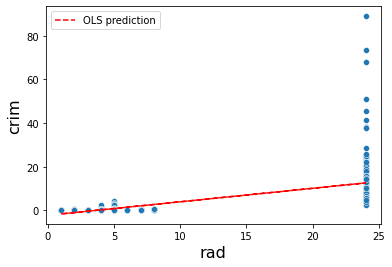

In [14]:
#График
X = data['rad']
Y = data['crim']
X = sm.add_constant(X)
model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()

predictions_lin = results_lin.predict()

fig, ax = plt.subplots()
sns.scatterplot(data=data, x='rad', y='crim')
ax.plot(X['rad'], predictions_lin, 'r--', label="OLS prediction")
ax.set_xlabel('rad',size=16)
ax.set_ylabel('crim',size=16)
ax.legend(loc="best")
#fig.savefig('mpg_linear.png')

In [7]:
X = data['tax']
Y = data['crim']
X = sm.add_constant(X)
model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()
print(results_lin.summary())
# 0.0297 имеет позитивний ефект на результат, с увеличением tax(полная ставка налога на имущество за \ $ 10,000.)
    #    увеличевается преступность
#R-squared:0.340, 34% данных описивается моделю
#F-statistic: 259.2, перемение имеють значения.
#P>|t| - существует статистически значимая связь между предиктором и ответом

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           2.36e-47
Time:                        02:56:12   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5284      0.816    -10.454      0.0

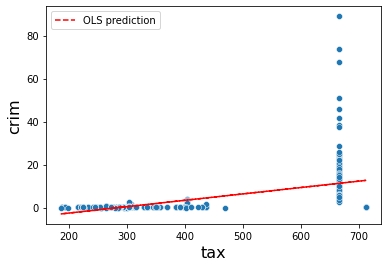

In [24]:
#График
X = data['tax']
Y = data['crim']
X = sm.add_constant(X)
model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()

predictions_lin = results_lin.predict()

fig, ax = plt.subplots()
sns.scatterplot(data=data, x='tax', y='crim')
ax.plot(X['tax'], predictions_lin, 'r--', label="OLS prediction")
ax.set_xlabel('tax',size=16)
ax.set_ylabel('crim',size=16)
ax.legend(loc="best")
#fig.savefig('mpg_linear.png')

In [9]:
X = data['ptratio']
Y = data['crim']
X = sm.add_constant(X)
model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()
print(results_lin.summary())

#  1.1520 имеет позитивний ефект на результат, с увеличением ptratio( соотношение учеников и учителей по городам.)
    #    увеличевается преступность
#R-squared:0.084, 8,4% данных описивается моделю
#F-statistic: 46.26, перемение имеють значения.
#P>|t| - существует статистически значимая связь между предиктором и ответом

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     46.26
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           2.94e-11
Time:                        02:56:50   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.6469      3.147     -5.607      0.0

In [10]:
X = data['lstat']
Y = data['crim']
X = sm.add_constant(X)
model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()
print(results_lin.summary())
# 0.5488 имеет позитивний ефект на результат, с увеличением lstat(более низкий статус населения (в процентах))
    #    увеличевается преступность
#R-squared:0.208, 20.8% данных описивается моделю
#F-statistic: 132.0, перемение имеють значения.
#P>|t| - существует статистически значимая связь между предиктором и ответом

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     132.0
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           2.65e-27
Time:                        02:57:04   Log-Likelihood:                -1747.5
No. Observations:                 506   AIC:                             3499.
Df Residuals:                     504   BIC:                             3507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3305      0.694     -4.801      0.0

In [11]:
X = data['medv']
Y = data['crim']
X = sm.add_constant(X)
model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()
print(results_lin.summary())
# -0.3632  имеет негативный ефект на результат, с увеличением medv(медианная стоимость домов, занимаемых владельцами, за 1000 долларов.)
    #    уменьшается преступность
#R-squared:0.151, 15.1% данных описивается моделю
#F-statistic: 89.49, перемение имеють значения.
#P>|t| - существует статистически значимая связь между предиктором и ответом

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.17e-19
Time:                        02:58:11   Log-Likelihood:                -1765.0
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7965      0.934     12.628      0.0

### Задание 2

- Подберите модель множественной регрессии, чтобы предсказать ответ с использованием всех предикторов. 
- Опишите свои результаты. 
- Для каких предикторов мы можем отклонить основную гипотезу $H_0: \beta_j = 0$?

In [45]:
data2 = pd.read_csv('Boston_dataset.csv',index_col=0)
data2.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [25]:
data2.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


In [46]:
X = data2[['zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','lstat','medv']]
Y = data2['crim']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           2.03e-56
Time:                        23:58:30   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.0

In [ ]:
# F статистика имеет очень низкое Р-значение, что означает что связь есть.
#𝑅2  значение равно почти 44.9%, наша модель объясняет почти 45% вариации в продаже.
# В множественной линейной регрессии, p-значения близко к нулю для zn,dis,rad medv, а для других - нет. Это говорит о том, что на crim влияют только  zn,dis,rad medv.
#Так же нужно исключить предикаты с коэф диапазоны которых, которые включают значение 0. И останеться наши предекаты zn,dis,rad,medv - для них мы отклоняем основную гипотезу

In [56]:
yhat = results.predict()
rse = np.sqrt((1/(len(X)-2))*np.sum((Y-yhat)**2))
rse

6.297173943341086

In [57]:
rse/np.mean(Y)*100

174.2668573613766

### Задание 3

- Как ваши результаты из первой задачи связаны с вашими результатами из второй задачи? 
- Создайте график, отображающий коэффициенты одномерной регрессии на оси x и соответствующие коэффициенты множественной регрессии на оси y. То есть каждый предиктор отображается как одна точка на графике. Его коэффициент в простой модели линейной регрессии показан на абсциссе, а его оценка коэффициента в модели множественной линейной регрессии показана на ординате.

(-2.0, 2.0)

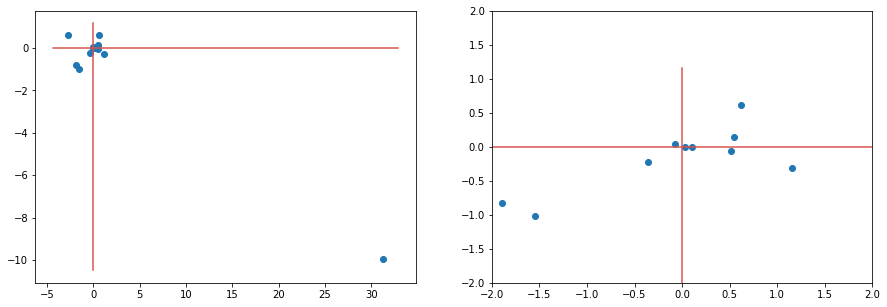

In [69]:
#множество коэффициентов предекатов одмерной модели, которые имели незначительный F квадрат сменили знак на противоположный
simple_reg=[-0.0739,0.5098,-1.8928,31.2485,-2.6841,0.1078,-1.5509,0.6179,0.0297,1.1520,0.5488,-0.3632]
mult_reg=[0.0457,-0.0584,-0.8254,-9.9576,0.6289,-0.0008,-1.0122,0.6125,-0.0038,-0.3041,0.1388,-0.2201]

fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].scatter(simple_reg, mult_reg)
x=axes[0].get_xlim()
axes[0].plot(x,len(x)*[0],sns.xkcd_rgb["pale red"])
y=axes[0].get_ylim()
axes[0].plot(len(y)*[0],y,sns.xkcd_rgb["pale red"])

axes[1].scatter(simple_reg, mult_reg)
x=axes[1].get_xlim()
axes[1].plot(x,len(x)*[0],sns.xkcd_rgb["pale red"])
y=axes[1].get_ylim()
axes[1].plot(len(y)*[0],y,sns.xkcd_rgb["pale red"])
axes[1].set_xlim([-2,2])
axes[1].set_ylim([-2,2])


### Задание 4

Есть ли доказательства нелинейной связи между какими-либо предикторами и ответом? Чтобы ответить на этот вопрос, обучите для каждого предиктора X модель до 3-ей степени, то есть $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3$

In [7]:
data3 = pd.read_csv('Boston_dataset.csv',index_col=0)
data3.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [8]:
data3['zn^2']=data3['zn']*data3['zn']
data3['zn^3']=data3['zn']*data3['zn']*data3['zn']

data3['indus^2']=data3['indus']*data3['indus']
data3['indus^3']=data3['indus']*data3['indus']*data3['indus']

data3['chas^2']=data3['chas']*data3['chas']
data3['chas^3']=data3['chas']*data3['chas']*data3['chas']

data3['nox^2']=data3['nox']*data3['nox']
data3['nox^3']=data3['nox']*data3['nox']*data3['nox']

data3['rm^2']=data3['rm']*data3['rm']
data3['rm^3']=data3['rm']*data3['rm']*data3['rm']

data3['age^2']=data3['age']*data3['age']
data3['age^3']=data3['age']*data3['age']*data3['age']

data3['dis^2']=data3['dis']*data3['dis']
data3['dis^3']=data3['dis']*data3['dis']*data3['dis']

data3['rad^2']=data3['rad']*data3['rad']
data3['rad^3']=data3['rad']*data3['rad']*data3['rad']

data3['tax^2']=data3['tax']*data3['tax']
data3['tax^3']=data3['tax']*data3['tax']*data3['tax']

data3['ptratio^2']=data3['ptratio']*data3['ptratio']
data3['ptratio^3']=data3['ptratio']*data3['ptratio']*data3['ptratio']

data3['lstat^2']=data3['lstat']*data3['lstat']
data3['lstat^3']=data3['lstat']*data3['lstat']*data3['lstat']

data3['medv^2']=data3['medv']*data3['medv']
data3['medv^3']=data3['medv']*data3['medv']*data3['medv']


In [9]:
data3.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,...,rad^2,rad^3,tax^2,tax^3,ptratio^2,ptratio^3,lstat^2,lstat^3,medv^2,medv^3
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,1,1,87616,25934336,234.09,3581.577,24.8004,123.505992,576.00,13824.000
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,4,8,58564,14172488,316.84,5639.752,83.5396,763.551944,466.56,10077.696
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,4,8,58564,14172488,316.84,5639.752,16.2409,65.450827,1204.09,41781.923
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,9,27,49284,10941048,349.69,6539.203,8.6436,25.412184,1115.56,37259.704
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,9,27,49284,10941048,349.69,6539.203,28.4089,151.419437,1310.44,47437.928


In [10]:
X = data3[['zn','zn^2','zn^3']]
Y = data3['crim']
X = sm.add_constant(X)
model_poly = sm.OLS(Y,X)
results_poly = model_poly.fit()
print(results_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           1.28e-06
Time:                        23:34:14   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8461      0.433     11.192      0.0

Text(0, 0.5, 'Residuals')

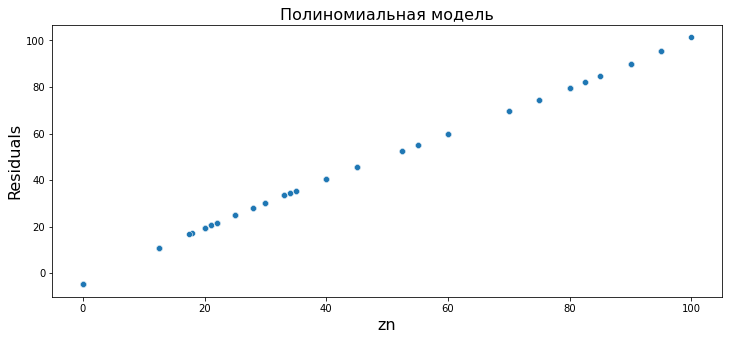

In [21]:
predictions_poly = results_poly.predict(X)
residuals_poly =  data['zn'] - predictions_poly
fig, ax = plt.subplots(figsize=(12,5))
sns.scatterplot(ax=ax,x=data3['zn'], y=residuals_poly)
ax.set_title('Полиномиальная модель',size=16)
ax.set_xlabel('zn',size=16)
ax.set_ylabel('Residuals',size=16) #есть не линейная звязь

In [22]:
X = data3[['indus','indus^2','indus^3']]
Y = data3['crim']
X = sm.add_constant(X)
model_poly = sm.OLS(Y,X)
results_poly = model_poly.fit()
print(results_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     58.69
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           1.55e-32
Time:                        23:39:33   Log-Likelihood:                -1730.3
No. Observations:                 506   AIC:                             3469.
Df Residuals:                     502   BIC:                             3486.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6626      1.574      2.327      0.0

Text(0, 0.5, 'Residuals')

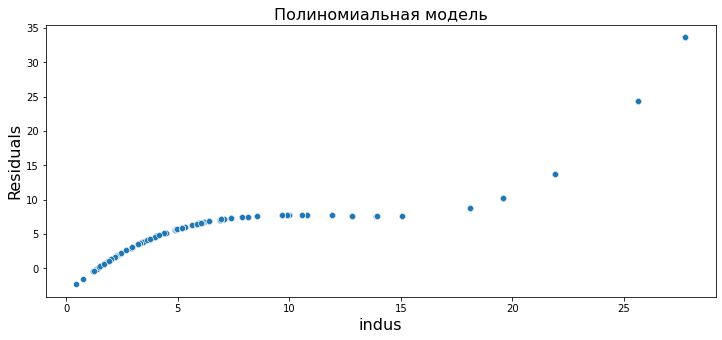

In [23]:
predictions_poly = results_poly.predict(X)
residuals_poly =  data['indus'] - predictions_poly
fig, ax = plt.subplots(figsize=(12,5))
sns.scatterplot(ax=ax,x=data3['indus'], y=residuals_poly)
ax.set_title('Полиномиальная модель',size=16)
ax.set_xlabel('indus',size=16)
ax.set_ylabel('Residuals',size=16) #есть нелинейная звязь

In [24]:
X = data3[['chas','chas^2','chas^3']]
Y = data3['crim']
X = sm.add_constant(X)
model_poly = sm.OLS(Y,X)
results_poly = model_poly.fit()
print(results_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Sun, 20 Nov 2022   Prob (F-statistic):              0.209
Time:                        23:40:20   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7444      0.396      9.453      0.0

Text(0, 0.5, 'Residuals')

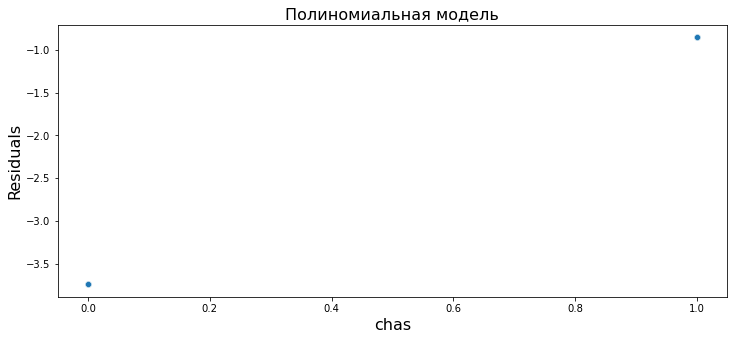

In [25]:
predictions_poly = results_poly.predict(X)
residuals_poly =  data['chas'] - predictions_poly
fig, ax = plt.subplots(figsize=(12,5))
sns.scatterplot(ax=ax,x=data3['chas'], y=residuals_poly)
ax.set_title('Полиномиальная модель',size=16)
ax.set_xlabel('chas',size=16)
ax.set_ylabel('Residuals',size=16) #нет нелинейной звязи

In [26]:
X = data3[['nox','nox^2','nox^3']]
Y = data3['crim']
X = sm.add_constant(X)
model_poly = sm.OLS(Y,X)
results_poly = model_poly.fit()
print(results_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     70.69
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           3.81e-38
Time:                        23:42:31   Log-Likelihood:                -1717.2
No. Observations:                 506   AIC:                             3442.
Df Residuals:                     502   BIC:                             3459.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        233.0866     33.643      6.928      0.0

Text(0, 0.5, 'Residuals')

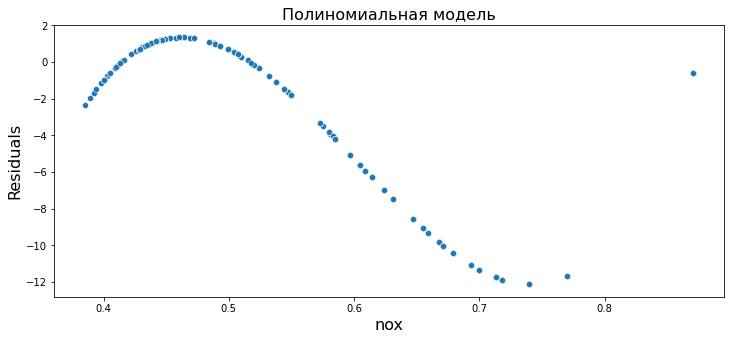

In [27]:
predictions_poly = results_poly.predict(X)
residuals_poly =  data['nox'] - predictions_poly
fig, ax = plt.subplots(figsize=(12,5))
sns.scatterplot(ax=ax,x=data3['nox'], y=residuals_poly)
ax.set_title('Полиномиальная модель',size=16)
ax.set_xlabel('nox',size=16)
ax.set_ylabel('Residuals',size=16) #есть нелинейная звязь

In [28]:
X = data3[['rm','rm^2','rm^3']]
Y = data3['crim']
X = sm.add_constant(X)
model_poly = sm.OLS(Y,X)
results_poly = model_poly.fit()
print(results_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     12.17
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           1.07e-07
Time:                        23:43:12   Log-Likelihood:                -1788.6
No. Observations:                 506   AIC:                             3585.
Df Residuals:                     502   BIC:                             3602.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        112.6246     64.517      1.746      0.0

Text(0, 0.5, 'Residuals')

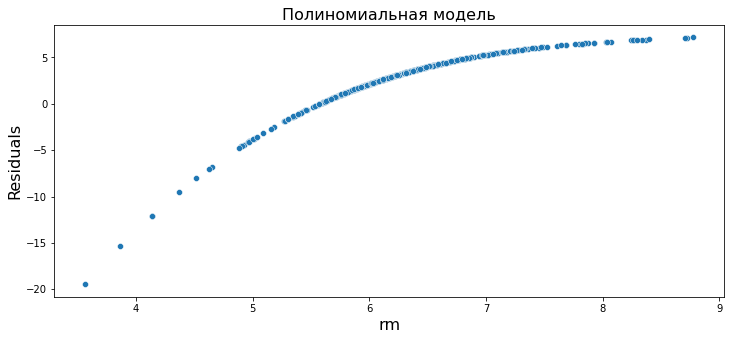

In [29]:
predictions_poly = results_poly.predict(X)
residuals_poly =  data['rm'] - predictions_poly
fig, ax = plt.subplots(figsize=(12,5))
sns.scatterplot(ax=ax,x=data3['rm'], y=residuals_poly)
ax.set_title('Полиномиальная модель',size=16)
ax.set_xlabel('rm',size=16)
ax.set_ylabel('Residuals',size=16) #есть нелинейная звязь

In [30]:
X = data3[['age','age^2','age^3']]
Y = data3['crim']
X = sm.add_constant(X)
model_poly = sm.OLS(Y,X)
results_poly = model_poly.fit()
print(results_poly.summary())


                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     35.31
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           1.02e-20
Time:                        23:43:55   Log-Likelihood:                -1757.9
No. Observations:                 506   AIC:                             3524.
Df Residuals:                     502   BIC:                             3541.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5488      2.769     -0.920      0.3

Text(0, 0.5, 'Residuals')

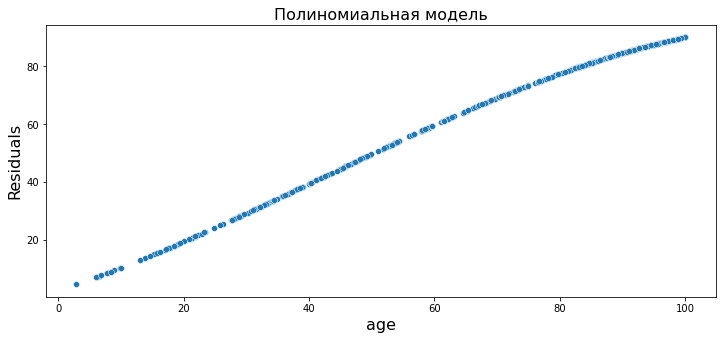

In [31]:
predictions_poly = results_poly.predict(X)
residuals_poly =  data['age'] - predictions_poly
fig, ax = plt.subplots(figsize=(12,5))
sns.scatterplot(ax=ax,x=data3['age'], y=residuals_poly)
ax.set_title('Полиномиальная модель',size=16)
ax.set_xlabel('age',size=16)
ax.set_ylabel('Residuals',size=16) #нет нелинейная звязи

In [32]:
X = data3[['dis','dis^2','dis^3']]
Y = data3['crim']
X = sm.add_constant(X)
model_poly = sm.OLS(Y,X)
results_poly = model_poly.fit()
print(results_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     64.37
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           3.14e-35
Time:                        23:45:29   Log-Likelihood:                -1724.0
No. Observations:                 506   AIC:                             3456.
Df Residuals:                     502   BIC:                             3473.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0476      2.446     12.285      0.0

Text(0, 0.5, 'Residuals')

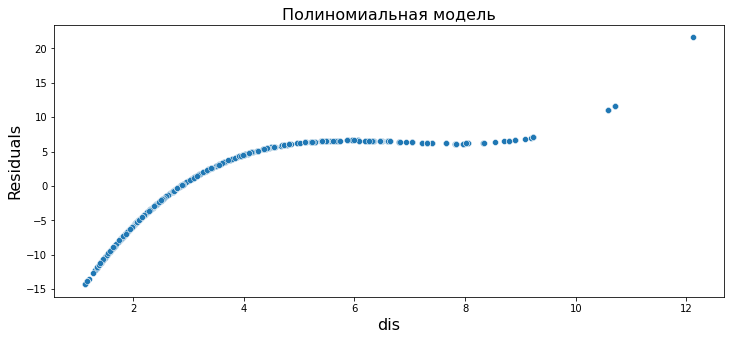

In [33]:
predictions_poly = results_poly.predict(X)
residuals_poly =  data['dis'] - predictions_poly
fig, ax = plt.subplots(figsize=(12,5))
sns.scatterplot(ax=ax,x=data3['dis'], y=residuals_poly)
ax.set_title('Полиномиальная модель',size=16)
ax.set_xlabel('dis',size=16)
ax.set_ylabel('Residuals',size=16) #есть нелинейная звязь

In [34]:
X = data3[['rad','rad^2','rad^3']]
Y = data3['crim']
X = sm.add_constant(X)
model_poly = sm.OLS(Y,X)
results_poly = model_poly.fit()
print(results_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     111.6
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           2.31e-55
Time:                        23:45:55   Log-Likelihood:                -1677.1
No. Observations:                 506   AIC:                             3362.
Df Residuals:                     502   BIC:                             3379.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6055      2.050     -0.295      0.7

Text(0, 0.5, 'Residuals')

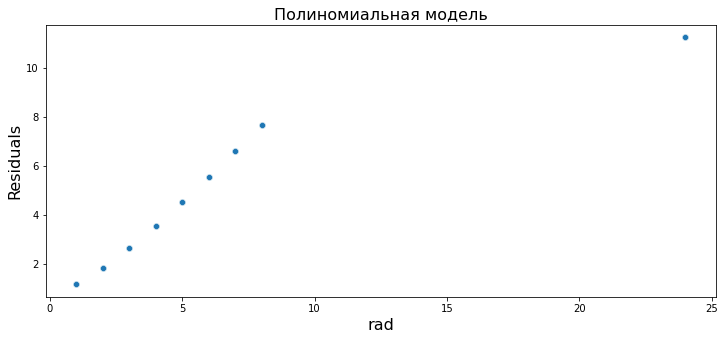

In [35]:
predictions_poly = results_poly.predict(X)
residuals_poly =  data['rad'] - predictions_poly
fig, ax = plt.subplots(figsize=(12,5))
sns.scatterplot(ax=ax,x=data3['rad'], y=residuals_poly)
ax.set_title('Полиномиальная модель',size=16)
ax.set_xlabel('rad',size=16)
ax.set_ylabel('Residuals',size=16) #нет нелинейной звязи, модель можна описать лінейной ригресией и исследовать выброс

In [37]:
X = data3[['tax','tax^2','tax^3']]
Y = data3['crim']
X = sm.add_constant(X)
model_poly = sm.OLS(Y,X)
results_poly = model_poly.fit()
print(results_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     97.80
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           7.34e-50
Time:                        23:48:04   Log-Likelihood:                -1689.9
No. Observations:                 506   AIC:                             3388.
Df Residuals:                     502   BIC:                             3405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1836     11.796      1.626      0.1

Text(0, 0.5, 'Residuals')

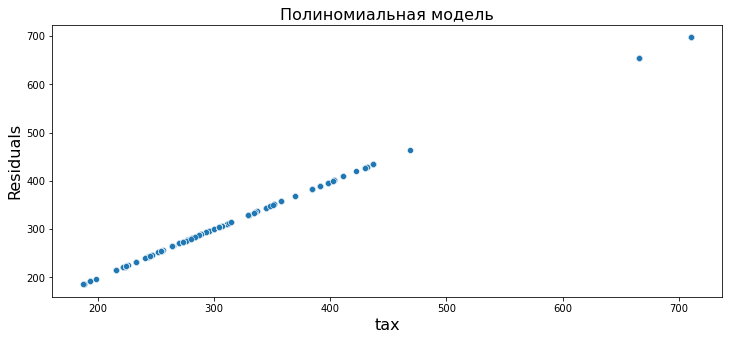

In [38]:
predictions_poly = results_poly.predict(X)
residuals_poly =  data['tax'] - predictions_poly
fig, ax = plt.subplots(figsize=(12,5))
sns.scatterplot(ax=ax,x=data3['tax'], y=residuals_poly)
ax.set_title('Полиномиальная модель',size=16)
ax.set_xlabel('tax',size=16)
ax.set_ylabel('Residuals',size=16) #нет нелинейной звязи

In [39]:
X = data3[['ptratio','ptratio^2','ptratio^3']]
Y = data3['crim']
X = sm.add_constant(X)
model_poly = sm.OLS(Y,X)
results_poly = model_poly.fit()
print(results_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     21.48
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           4.17e-13
Time:                        23:49:47   Log-Likelihood:                -1775.8
No. Observations:                 506   AIC:                             3560.
Df Residuals:                     502   BIC:                             3577.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        477.1840    156.795      3.043      0.0

Text(0, 0.5, 'Residuals')

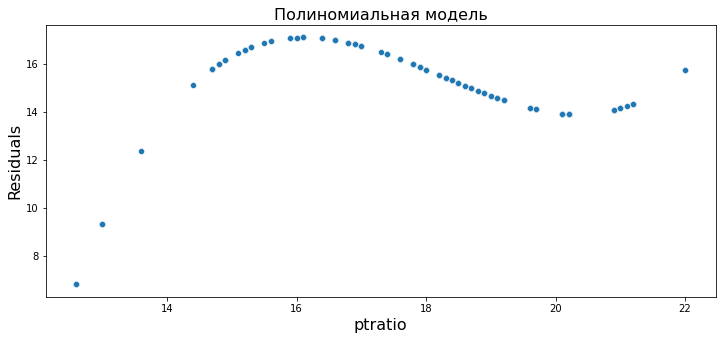

In [40]:
predictions_poly = results_poly.predict(X)
residuals_poly =  data['ptratio'] - predictions_poly
fig, ax = plt.subplots(figsize=(12,5))
sns.scatterplot(ax=ax,x=data3['ptratio'], y=residuals_poly)
ax.set_title('Полиномиальная модель',size=16)
ax.set_xlabel('ptratio',size=16)
ax.set_ylabel('Residuals',size=16) #есть нелинейная звязь

In [41]:
X = data3[['lstat','lstat^2','lstat^3']]
Y = data3['crim']
X = sm.add_constant(X)
model_poly = sm.OLS(Y,X)
results_poly = model_poly.fit()
print(results_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     46.63
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           1.35e-26
Time:                        23:50:27   Log-Likelihood:                -1744.2
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     502   BIC:                             3513.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2010      2.029      0.592      0.5

Text(0, 0.5, 'Residuals')

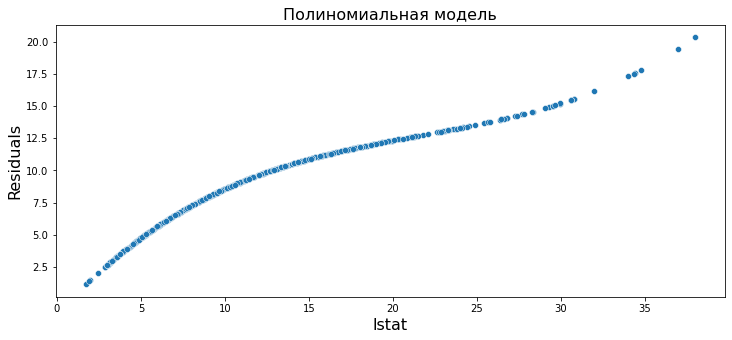

In [42]:
predictions_poly = results_poly.predict(X)
residuals_poly =  data['lstat'] - predictions_poly
fig, ax = plt.subplots(figsize=(12,5))
sns.scatterplot(ax=ax,x=data3['lstat'], y=residuals_poly)
ax.set_title('Полиномиальная модель',size=16)
ax.set_xlabel('lstat',size=16)
ax.set_ylabel('Residuals',size=16) #есть нелинейная звязь

In [151]:
X = data3[['medv','medv^2','medv^3']]
Y = data3['crim']
X = sm.add_constant(X)
model_poly = sm.OLS(Y,X)
results_poly = model_poly.fit()
print(results_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     121.3
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           4.45e-59
Time:                        02:57:36   Log-Likelihood:                -1668.5
No. Observations:                 506   AIC:                             3345.
Df Residuals:                     502   BIC:                             3362.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.1655      3.356     15.840      0.0

Text(0, 0.5, 'Residuals')

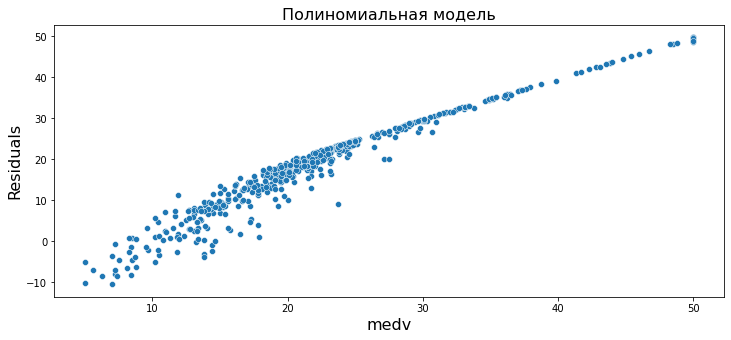

In [43]:
predictions_poly = results_poly.predict(X)
residuals_poly =  data['medv'] - predictions_poly
fig, ax = plt.subplots(figsize=(12,5))
sns.scatterplot(ax=ax,x=data3['medv'], y=residuals_poly)
ax.set_title('Полиномиальная модель',size=16)
ax.set_xlabel('medv',size=16)
ax.set_ylabel('Residuals',size=16) #есть нелинейная звязь